In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.load_and_overview import *
from scripts.aggregate_features import *
from scripts.extract_features import *
from scripts.encode_categ_var import *
from scripts.handle_missing_val import *
from scripts.standardize_num import *
from scripts.estimator_WoE_binning import *

In [3]:
# Load the file and print overview and summary
data_url = "../../Data/data.csv"
df = load_data(data_url)
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [4]:
agreg_data = create_aggregate_features(df)
# agreg_data
extr_data = extract_features(agreg_data)
extr_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,2438140.00,4255.043630,573,22554.029939,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,58499.60,1360.455814,43,2274.756582,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,58499.60,1360.455814,43,2274.756582,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,0,851985.00,1625.925573,524,3207.920536,10,13,2,2019


In [5]:
# This transformation allows machine learning algorithms to utilize the categorical features effectively.
enco_data = encode_categorical_variables(extr_data, ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult'])
enco_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,0,5,ProductId_10,0,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,0,3,ProductId_6,2,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,0,5,ProductId_1,0,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,0,ProductId_21,8,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,0,3,ProductId_6,2,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0,0,3,ProductId_6,2,...,2,0,2438140.00,4255.043630,573,22554.029939,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0,0,5,ProductId_10,0,...,2,0,58499.60,1360.455814,43,2274.756582,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0,0,3,ProductId_6,2,...,2,0,58499.60,1360.455814,43,2274.756582,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0,0,5,ProductId_19,7,...,2,0,851985.00,1625.925573,524,3207.920536,10,13,2,2019


In [6]:
msV_data = handle_missing_values(enco_data)
msV_data

c:\Users\pc\Desktop\10_Academy\Week-6\kaim-week-6\scripts\handle_missing_val.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols].fillna(df[numeric_cols].mean(), inplace=True)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,0,5,ProductId_10,0,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,0,3,ProductId_6,2,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,0,5,ProductId_1,0,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,0,ProductId_21,8,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,0,3,ProductId_6,2,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0,0,3,ProductId_6,2,...,2,0,2438140.00,4255.043630,573,22554.029939,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0,0,5,ProductId_10,0,...,2,0,58499.60,1360.455814,43,2274.756582,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0,0,3,ProductId_6,2,...,2,0,58499.60,1360.455814,43,2274.756582,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0,0,5,ProductId_19,7,...,2,0,851985.00,1625.925573,524,3207.920536,10,13,2,2019


In [7]:
nor_standa_data = normalize_standardize(msV_data, ['total_transaction_amount', 'average_transaction_amount'], method='normalize')
nor_standa_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,0,5,ProductId_10,0,...,2,0,0.557522,0.047184,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,0,3,ProductId_6,2,...,2,0,0.557522,0.047184,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,0,5,ProductId_1,0,...,2,0,0.556944,0.047137,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,0,ProductId_21,8,...,2,0,0.558153,0.047749,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,0,3,ProductId_6,2,...,2,0,0.558153,0.047749,38,17169.241610,3,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0,0,3,ProductId_6,2,...,2,0,0.569883,0.047553,573,22554.029939,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0,0,5,ProductId_10,0,...,2,0,0.557249,0.047233,43,2274.756582,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0,0,3,ProductId_6,2,...,2,0,0.557249,0.047233,43,2274.756582,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0,0,5,ProductId_19,7,...,2,0,0.561462,0.047262,524,3207.920536,10,13,2,2019


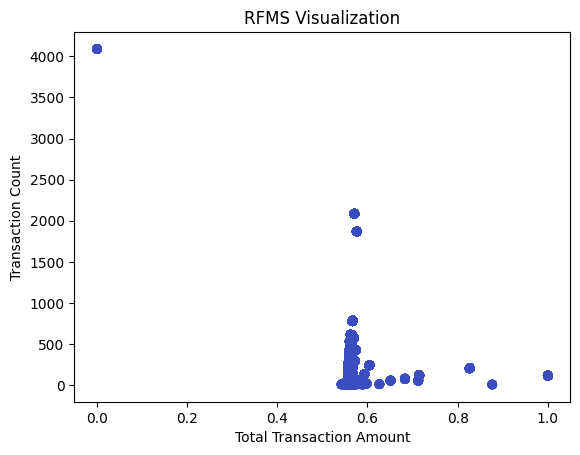

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,transaction_hour,transaction_day,transaction_month,transaction_year,RFMS_score,default_label
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,0,5,ProductId_10,0,...,0.557522,0.047184,119,3042.294251,2,15,11,2018,1406.085828,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,0,3,ProductId_6,2,...,0.557522,0.047184,119,3042.294251,2,15,11,2018,1406.085828,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,0,5,ProductId_1,0,...,0.556944,0.047137,2,0.000000,2,15,11,2018,23.630691,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,0,ProductId_21,8,...,0.558153,0.047749,38,17169.241610,3,15,11,2018,444.196164,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,0,3,ProductId_6,2,...,0.558153,0.047749,38,17169.241610,3,15,11,2018,444.196164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0,0,3,ProductId_6,2,...,0.569883,0.047553,573,22554.029939,9,13,2,2019,6866.882788,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0,0,5,ProductId_10,0,...,0.557249,0.047233,43,2274.756582,9,13,2,2019,507.312432,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0,0,3,ProductId_6,2,...,0.557249,0.047233,43,2274.756582,9,13,2,2019,507.312432,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0,0,5,ProductId_19,7,...,0.561462,0.047262,524,3207.920536,10,13,2,2019,6224.993829,0


In [9]:
# Default Estimator
construct_default_estimator(nor_standa_data)

In [11]:
iv_value, df_renamed = calulate_iv_wrapper(nor_standa_data, 'total_transaction_amount', 'FraudResult')
# WoE Binning
# df_transformed, evaluation = woe_transformation(df_renamed, 'total_transaction_amount', 'target')
print("DF-Transformed: ")
df_renamed.columns
print("IV: ")
# iv_value
# print("Evaluation: ")
# evaluation

DF-Transformed: 
IV: 
